In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

my_format = mdates.DateFormatter('%d-%b-%y %H:%m')

In [2]:
# Define plot function
"""
Notes: Plot where the algorithm charges and discharges
----------
Parameters
----------
spot_price       : dataframe with spot_price & forecast columns
action           : discharge if value > 0, charge if value < 0
opening_capacity : plot closing capacity if provided
start            : start index (default=0)
end              : end index (default=300)

Returns
-------
plot with discharge and charge verticle lines
"""

def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique), fontsize=10)

In [3]:
chart_data = pd.read_csv('test_result.csv', parse_dates=['time'], index_col='time')
opening_capacity = chart_data.opening_capacity
spot_price = chart_data.spot_price
action = chart_data.power

In [4]:
start_day = 11
days_to_plot = 2
start = int(288*(start_day-1))
end = int(288*(start_day+days_to_plot-1))

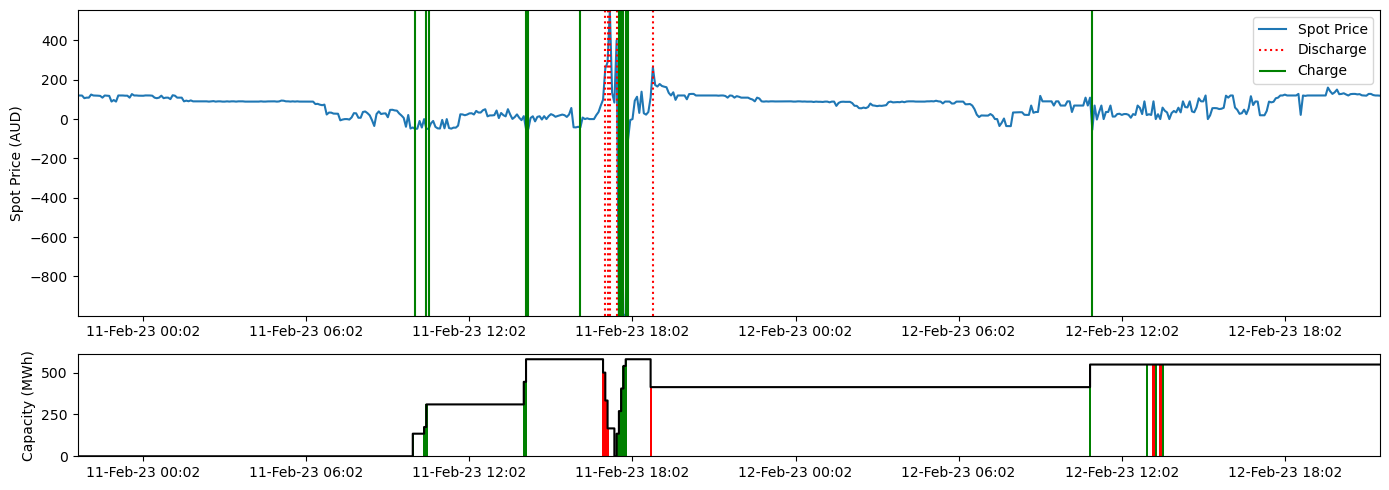

In [15]:
        
# Prepare vertical line chart data
action_non_zero = action[action!=0]
line_condlist = [action_non_zero < 0, action_non_zero > 0]
line_colour_choicelist = ['green', 'red']
linestyle_choicelist = ['dotted', 'solid']
linestyles = np.select(line_condlist, linestyle_choicelist, default='solid')
line_colours = np.select(line_condlist, line_colour_choicelist, default='white')

# Prepare bar chart data
closing_capacity = opening_capacity.shift(-1)
capacity_delta = closing_capacity - opening_capacity

# Prepare bar chart colours
condlist = [capacity_delta < 0, capacity_delta==0, capacity_delta > 0]
choicelist = ['red', 'white', 'green']
capacity_delta_colours = np.select(condlist, choicelist)

bar_x_values = closing_capacity.index[start:end]
bar_y_values = closing_capacity[start:end]

fig, axs = plt.subplots(2, 1, figsize=(14,5), gridspec_kw={'height_ratios': [3, 1]})
axs[0].plot(spot_price[start:end], label='Spot Price')
axs[0].set_ylabel('Spot Price (AUD)', fontsize=10)
axs[0].set_ylim(spot_price[start:end].min(), spot_price[start:end].max())
axs[0].vlines(x = action[action > 0].index, ymin = -1000, ymax = 20000, linestyle = 'dotted', color = 'red', label = 'Discharge')
axs[0].vlines(x = action[action < 0].index, ymin = -1000, ymax = 20000, linestyle = 'solid', color = 'green', label = 'Charge')
legend_without_duplicate_labels(axs[0])
axs[0].set_xlim(bar_x_values[0], bar_x_values[-1])

axs[1].bar(x=bar_x_values,
            height=bar_y_values,
            color=capacity_delta_colours[start:end],
            align='edge',
            width=-0.005)
axs[1].step(x=bar_x_values,
            y=bar_y_values,
            color='black')

axs[1].set_ylabel('Capacity (MWh)', fontsize=10)
axs[1].set_xlim(bar_x_values[0], bar_x_values[-1])
axs[0].xaxis.set_major_formatter(my_format)
axs[1].xaxis.set_major_formatter(my_format)
plt.tight_layout()    

plt.show()

In [6]:
test = pd.concat([opening_capacity, closing_capacity, action], axis=1)
test

,opening_capacity,opening_capacity,power
time,,,
2023-02-01 00:05:00,0.0,135.0,-300.0
2023-02-01 00:10:00,135.0,135.0,0.0
2023-02-01 00:15:00,135.0,135.0,0.0
2023-02-01 00:20:00,135.0,135.0,0.0
2023-02-01 00:25:00,135.0,135.0,0.0
...,...,...,...
2024-02-29 23:40:00,0.0,0.0,0.0
2024-02-29 23:45:00,0.0,0.0,0.0
2024-02-29 23:50:00,0.0,0.0,0.0


In [ ]:
capacity_delta